In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load MNIST dataset
(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten input (28x28 -> 784)
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

# Build Autoencoder
encoding_dim = 32  # size of the compressed representation

# Encoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Encode and Decode some images
encoded_imgs = autoencoder.predict(x_test)
print("Reconstruction done!")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3857 - val_loss: 0.1898
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1800 - val_loss: 0.1545
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1503 - val_loss: 0.1350
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1327 - val_loss: 0.1221
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1210 - val_loss: 0.1135
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1135 - val_loss: 0.1075
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1075 - val_loss: 0.1029
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1032 - val_loss: 0.0996
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1001 - val_loss: 0.0973
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0967 - val_loss: 0.0945


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


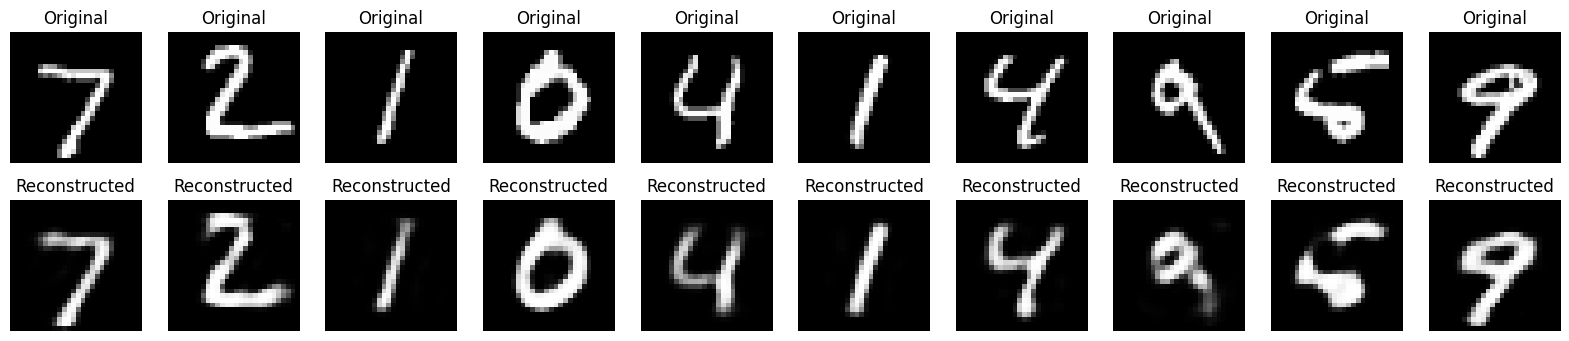

In [ ]:
import matplotlib.pyplot as plt

# Encode and Decode test images
decoded_imgs = autoencoder.predict(x_test)

# Show original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()
